In [1]:
HAPLOGREP = "/home/analytics/distr/haplogrep-cmd/haplogrep-2.1.16.jar"
BCFTOOLS = "/home/analytics/distr/samtools/bcftools/bcftools"
TOVCF = "/home/analytics/anaconda3/envs/bioinf/bin/23andme-to-vcf"

In [2]:
!mkdir -p ../data/week7

### Obtain professor's SNPs as well as github-guy's

In [3]:
!wget -P ../data/week7 http://public.dobzhanskycenter.ru/mrayko/BIMM185/SNP_raw_v4_Full_20170514175358.txt
!mv ../data/week7/SNP_raw_v4_Full_20170514175358.txt ../data/week7/SNP_prof.txt

!git clone https://github.com/msporny/dna ../data/week7/dna
!cp ../data/week7/dna/ManuSporny-genome.txt ../data/week7/SNP_gh.txt

--2018-11-20 22:03:42--  http://public.dobzhanskycenter.ru/mrayko/BIMM185/SNP_raw_v4_Full_20170514175358.txt
Resolving public.dobzhanskycenter.ru (public.dobzhanskycenter.ru)... 195.70.204.3
Connecting to public.dobzhanskycenter.ru (public.dobzhanskycenter.ru)|195.70.204.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15683002 (15M) [text/plain]
Saving to: ‘../data/week7/SNP_raw_v4_Full_20170514175358.txt’

100%[======================================>] 15,683,002  28.5MB/s   in 0.5s   

2018-11-20 22:03:43 (28.5 MB/s) - ‘../data/week7/SNP_raw_v4_Full_20170514175358.txt’ saved [15683002/15683002]

Cloning into '../data/week7/dna'...
remote: Enumerating objects: 18, done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 18
Unpacking objects: 100% (18/18), done.


### Use GENOtation so as to get a clue about ethnicity
http://genotation.stanford.edu/#PCA

In [5]:
from matplotlib import pyplot as plt

%matplotlib inline

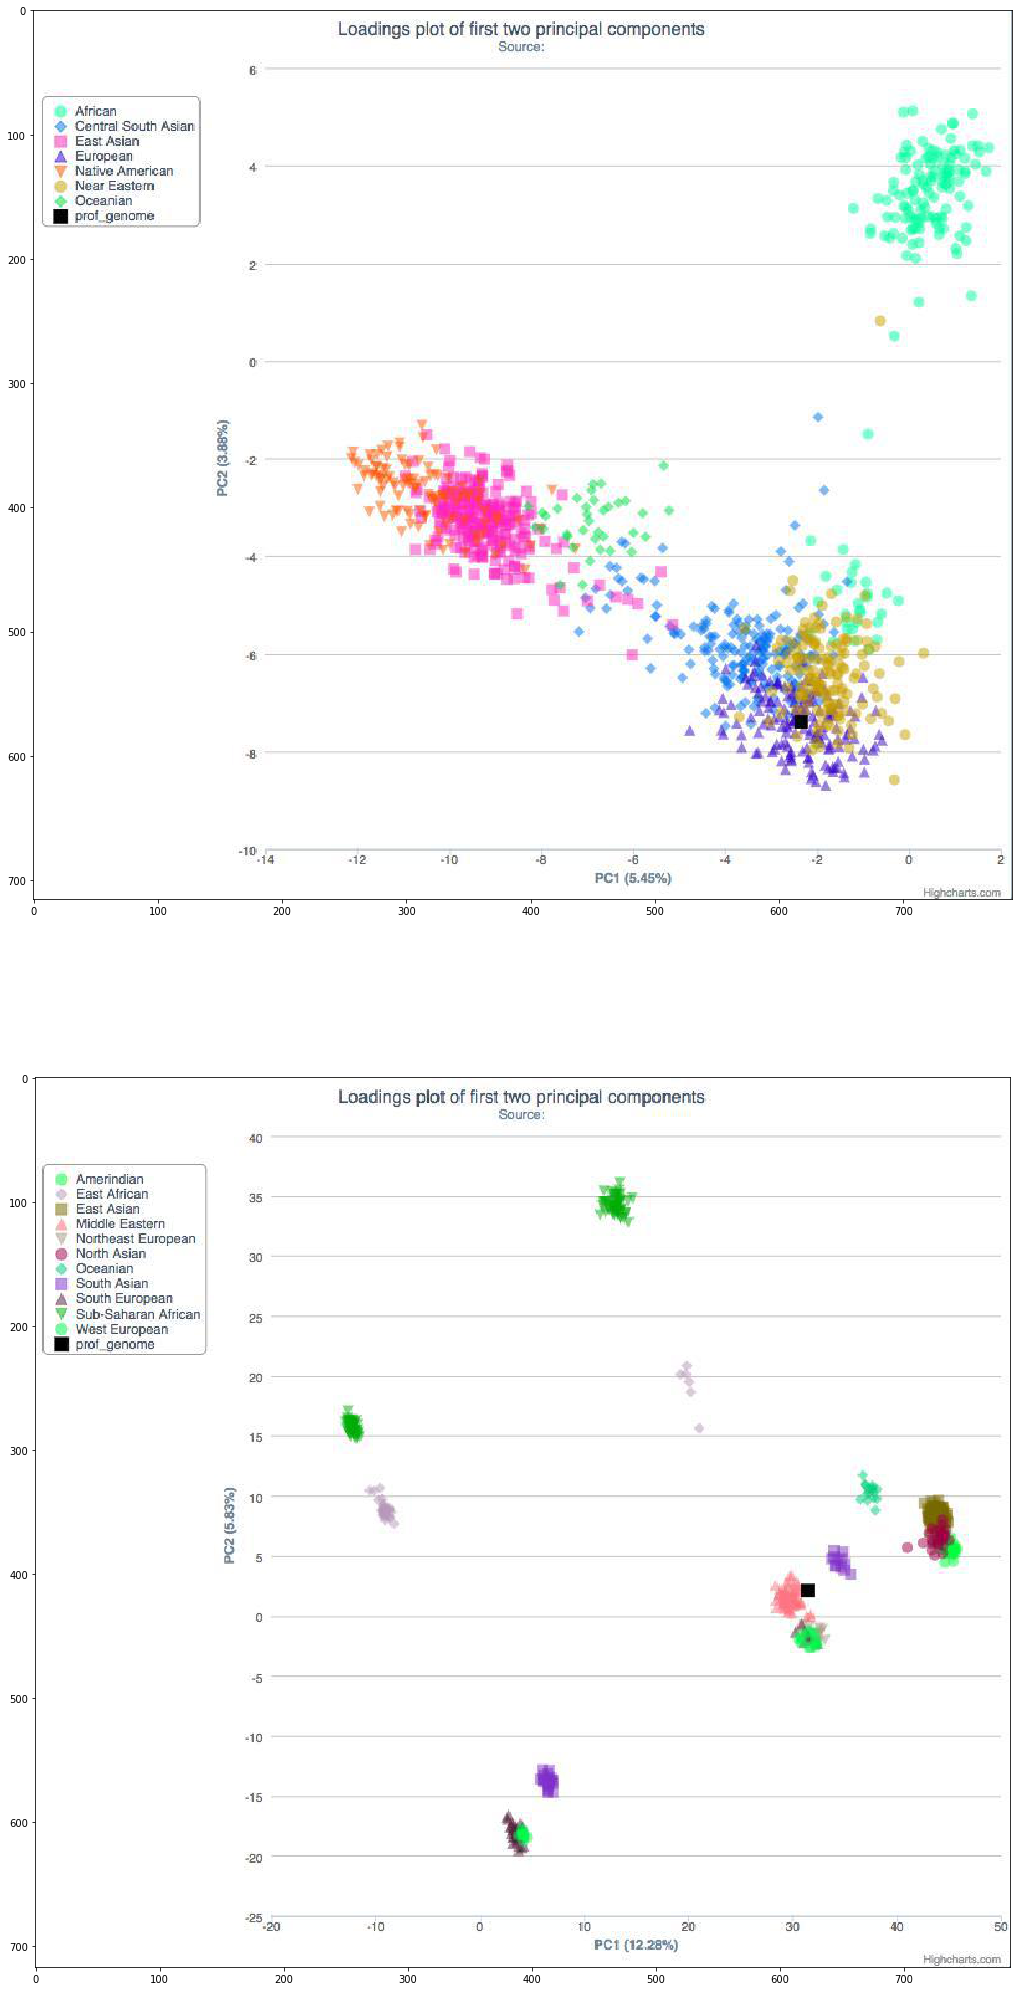

In [14]:
hgdp_prof = plt.imread("../data/week7/hgdp_prof.jpg")
ref_prof  = plt.imread("../data/week7/ref_prof.jpg")

fig = plt.figure(figsize=(18, 36))
ax = fig.add_subplot(2, 1, 1)
ax.imshow(hgdp_prof)

ax = fig.add_subplot(2, 1, 2)
ax.imshow(ref_prof)

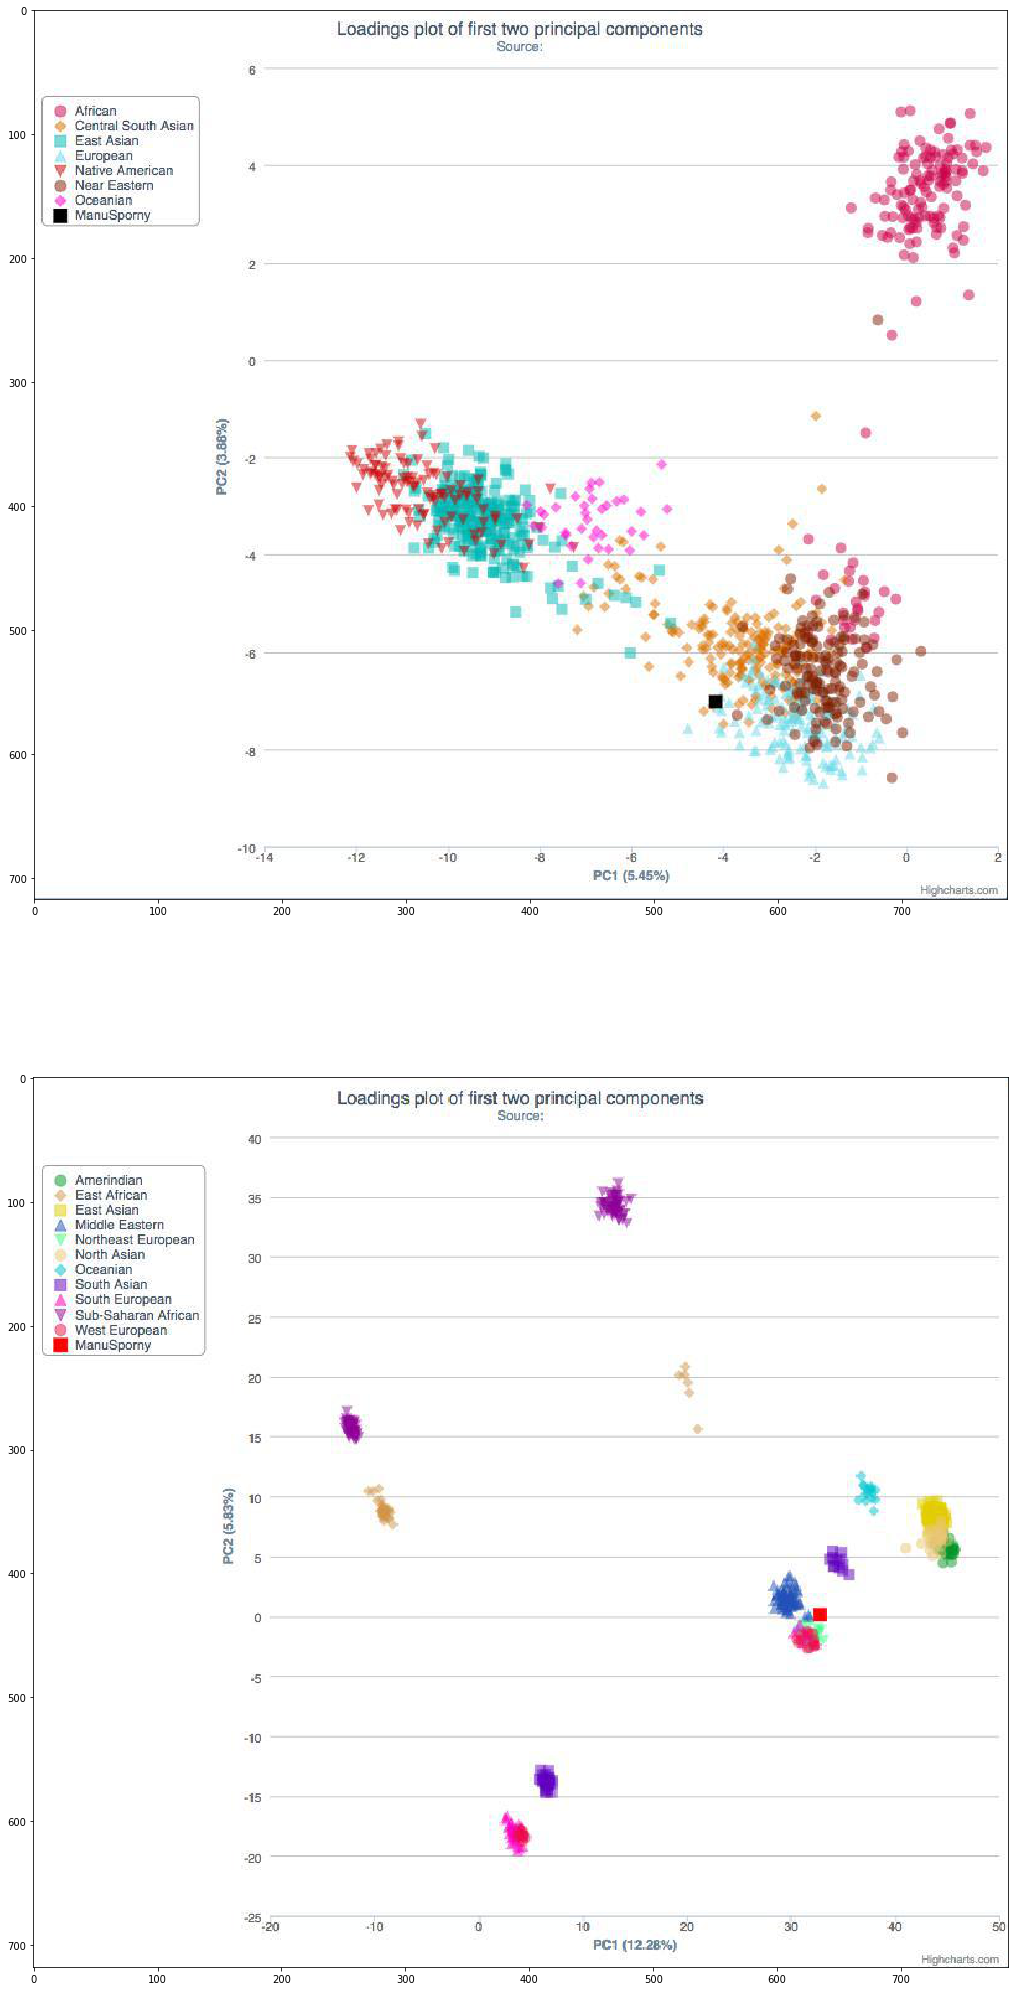

In [16]:
hgdp_sporny = plt.imread("../data/week7/hgdp_sporny.jpg")
ref_sporny  = plt.imread("../data/week7/ref_sporny.jpg")

fig = plt.figure(figsize=(18, 36))
ax = fig.add_subplot(2, 1, 1)
ax.imshow(hgdp_sporny)

ax = fig.add_subplot(2, 1, 2)
ax.imshow(ref_sporny)

### Let's determine Y-chromosome haplogroup

In [19]:
!wget -P /data/analytics/bioinf_workshop/data/week7/ http://hgdownload.cse.ucsc.edu/goldenPath/hg18/bigZips/hg18.2bit

--2018-11-21 20:23:34--  http://hgdownload.cse.ucsc.edu/goldenPath/hg18/bigZips/hg18.2bit
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 807604784 (770M) [text/plain]
Saving to: ‘/data/analytics/bioinf_workshop/data/week7/hg18.2bit’

100%[======================================>] 807,604,784 16.8MB/s   in 52s    

2018-11-21 20:24:31 (14.7 MB/s) - ‘/data/analytics/bioinf_workshop/data/week7/hg18.2bit’ saved [807604784/807604784]



In [20]:
TWOBITTOFA = "/home/analytics/distr/twoBitToFa"

In [21]:
!$TWOBITTOFA /data/analytics/bioinf_workshop/data/week7/hg18.2bit /data/analytics/bioinf_workshop/data/week7/hg18.fa

In [24]:
SAMTOOLS = "/home/analytics/distr/samtools/samtools"

In [26]:
!$SAMTOOLS faidx /data/analytics/bioinf_workshop/data/week7/hg18.fa

In [63]:
!cat ../data/week7/SNP_gh.txt | perl -pe 's/MT/M/' > ../data/week7/SNP_gh_.txt
!cat ../data/week7/SNP_prof.txt | perl -pe 's/MT/M/' > ../data/week7/SNP_prof_.txt

In [64]:
!$BCFTOOLS convert --tsv2vcf ../data/week7/SNP_gh_.txt \
                    -f /data/analytics/bioinf_workshop/data/week6/hg19_.fa \
                    -s SNP -Ob -o ../data/week7/SNP_gh.bcf
!$BCFTOOLS view ../data/week7/SNP_gh.bcf > ../data/week7/SNP_gh.vcf

!$BCFTOOLS convert --tsv2vcf ../data/week7/SNP_prof_.txt \
                    -f /data/analytics/bioinf_workshop/data/week6/hg19_.fa \
                    -s SNP -Ob -o ../data/week7/SNP_prof.bcf
!$BCFTOOLS view ../data/week7/SNP_prof.bcf > ../data/week7/SNP_prof.vcf

Rows total: 	966977
Rows skipped: 	1090
Missing GTs: 	6325
Hom RR: 	167083
Het RA: 	142401
Hom AA: 	505305
Het AA: 	144773
Rows total: 	610526
Rows skipped: 	15125
Missing GTs: 	6403
Hom RR: 	315957
Het RA: 	164637
Hom AA: 	108403
Het AA: 	1


In [37]:
CALLHAPLOGROUPS = "/home/analytics/distr/yhaplo/callHaplogroups.py"

In [65]:
!cat ../data/week7/SNP_gh.vcf | grep -e "^#" > ../data/week7/SNP_Y_gh.vcf
!cat ../data/week7/SNP_gh.vcf | grep -e "^Y" >> ../data/week7/SNP_Y_gh.vcf

!cat ../data/week7/SNP_prof.vcf | grep -e "^#" > ../data/week7/SNP_Y_prof.vcf
!cat ../data/week7/SNP_prof.vcf | grep -e "^Y" >> ../data/week7/SNP_Y_prof.vcf

In [66]:
!/usr/bin/python $CALLHAPLOGROUPS -i ../data/week7/SNP_Y_prof.vcf -o ../data/week7/haplo_y_prof 2> /dev/null

In [67]:
!cat ../data/week7/haplo_y_gh/haplogroups.SNP_Y_gh.txt

SNP      A               A               A                        


Not a surprise, we don't know the reference, SNPs for github-guy were mapped to, so the result is unsatisfactory.

In [68]:
!cat ../data/week7/haplo_y_prof/haplogroups.SNP_Y_prof.txt

SNP      R-Page7         R-M417          R1a1a1                   


For prof genome we got it.

In [69]:
!cat ../data/week7/SNP_gh.vcf | grep -e "^#" > ../data/week7/SNP_MT_gh.vcf
!cat ../data/week7/SNP_gh.vcf | grep -e "^M" >> ../data/week7/SNP_MT_gh.vcf

!cat ../data/week7/SNP_prof.vcf | grep -e "^#" > ../data/week7/SNP_MT_prof.vcf
!cat ../data/week7/SNP_prof.vcf | grep -e "^M" >> ../data/week7/SNP_MT_prof.vcf

In [78]:
!java -jar $HAPLOGREP --format vcf --in ../data/week7/SNP_MT_gh.vcf --out ../data/week7/SNP_MT_gh.out > /dev/null
!java -jar $HAPLOGREP --format vcf --in ../data/week7/SNP_MT_prof.vcf --out ../data/week7/SNP_MT_prof.out > /dev/null

In [79]:
!cat ../data/week7/SNP_MT_gh.out

SampleID	Range	Haplogroup	Overall_Rank
SNP	1-16569;	H2a2a1	0.5000


In [80]:
!cat ../data/week7/SNP_MT_prof.out

SampleID	Range	Haplogroup	Overall_Rank
SNP	1-16569;	H+152	0.7543


### Now it's time to clinically significant SNPs

In [82]:
import pandas as pd

In [84]:
!wget -P ../data/week7/ ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh37/clinvar_20181028.vcf.gz
!gunzip ../data/week7/clinvar_20181028.vcf.gz

--2018-11-21 21:05:19--  ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh37/clinvar_20181028.vcf.gz
           => ‘../data/week7/clinvar_20181028.vcf.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 2607:f220:41e:250::11
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/clinvar/vcf_GRCh37 ... done.
==> SIZE clinvar_20181028.vcf.gz ... 17591643
==> PASV ... done.    ==> RETR clinvar_20181028.vcf.gz ... done.
Length: 17591643 (17M) (unauthoritative)

100%[======================================>] 17,591,643  10.8MB/s   in 1.5s   

2018-11-21 21:05:22 (10.8 MB/s) - ‘../data/week7/clinvar_20181028.vcf.gz’ saved [17591643]



In [85]:
clinvar_df = pd.read_csv("../data/week7/clinvar_20181028.vcf", skiprows=28, sep="\s+", header=None)
clinvar_df.columns = "CHROM POS ID REF ALT QUAL FILTER INFO".split()
clinvar_df.shape

/home/analytics/anaconda3/envs/bioinf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(429249, 8)

In [87]:
from tqdm import tqdm_notebook as tqdm

In [88]:
clinvar_df.loc[:, ["CHROM", "POS", "REF", "ALT"]]
clin_dict = dict()

for row in tqdm(clinvar_df.iterrows(), total=clinvar_df.shape[0]):
    clin_dict[tuple(row[1][["CHROM", "POS", "REF", "ALT"]].tolist())] = tuple(row[1][["ID", "INFO"]].tolist())

In [100]:
prof_snp_df = pd.read_csv("../data/week7/SNP_prof.vcf", skiprows=101, sep="\t")
prof_snp_df.columns = ["chromosome", "pos", "id", "ref", "alt", "qual", "filter", "info", "format", "sample"]

/home/analytics/anaconda3/envs/bioinf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
key

['X', 178624, 'G', '.']

In [103]:
row

(571271, chromosome            X
 pos              178624
 id            rs6644972
 ref                   G
 alt                   .
 qual                  .
 filter                .
 info                  .
 format               GT
 sample              0/0
 Name: 571271, dtype: object)

In [105]:
prof_clin_sig = []

for row in tqdm(prof_snp_df.iterrows(), total=prof_snp_df.shape[0]):
    key = row[1][["chromosome", "pos", "ref", "alt"]].tolist()
    try:
        key[0] = int(key[0])
    except ValueError:
        pass
    key = tuple(key)
    if key in clin_dict:
        prof_clin_sig.append(clin_dict[key])

In [147]:
types = set()
patho = []

for snp in prof_clin_sig:
    prop_dict = dict([tuple(s.split("=")) for s in snp[1].split(";")])
    types.add(prop_dict.get("CLNSIG", "Benign"))

    if prop_dict.get("CLNSIG", "") == "Pathogenic":
        patho.append(prop_dict)

In [151]:
patho

[{'ALLELEID': '19567',
  'CLNDISDB': 'MedGen:C4016960',
  'CLNDN': 'Diabetes_mellitus,_noninsulin-dependent,_association_with',
  'CLNHGVS': 'NC_000004.11:g.6295693C>G',
  'CLNREVSTAT': 'no_assertion_criteria_provided',
  'CLNSIG': 'Pathogenic',
  'CLNVC': 'single_nucleotide_variant',
  'CLNVCSO': 'SO:0001483',
  'CLNVI': 'OMIM_Allelic_Variant:606201.0022',
  'GENEINFO': 'WFS1:7466',
  'MC': 'SO:0001627|intron_variant',
  'ORIGIN': '1',
  'RS': '6446482'},
 {'ALLELEID': '27191',
  'CLNDISDB': 'MedGen:C0852654,OMIM:201910|MedGen:CN517202',
  'CLNDN': '21-hydroxylase_deficiency|not_provided',
  'CLNHGVS': 'NC_000006.11:g.32008312C>T',
  'CLNREVSTAT': 'criteria_provided,_multiple_submitters,_no_conflicts',
  'CLNSIG': 'Pathogenic',
  'CLNVC': 'single_nucleotide_variant',
  'CLNVCSO': 'SO:0001483',
  'CLNVI': 'OMIM_Allelic_Variant:613815.0003|OMIM_Allelic_Variant:613815.0033',
  'GENEINFO': 'CYP21A2:1589|LOC106780800:106780800',
  'MC': 'SO:0001583|missense_variant',
  'ORIGIN': '1',
  'RS

In [ ]:
types = set()


for snp in clin_dict.items():
    prop_dict = dict([tuple(s.split("=")) for s in snp[1].split(";")])
    types.add(prop_dict.get("CLNSIG", "Benign"))

    if prop_dict.get("CLNSIG", "") == "Pathogenic":
        patho.append(prop_dict)

In [165]:
all_types = set()
protective = []

for k, v in clin_dict.items():
    cur_dict = dict([s.split("=") for s in v[1].split(";")])
    all_types.add(cur_dict.get("CLNSIG", "Benign"))
    
    if cur_dict.get("CLNSIG", "") == "protective":
        protective.append(cur_dict)

In [166]:
protective

[{'AF_ESP': '0.0469',
  'AF_EXAC': '0.04221',
  'AF_TGP': '0.0228',
  'ALLELEID': '18147',
  'CLNDISDB': 'MedGen:C4017090|MedGen:C4017658',
  'CLNDN': 'Inflammatory_bowel_disease_17,_protection_against|Psoriasis,_protection_against',
  'CLNHGVS': 'NC_000001.10:g.67705958G>A',
  'CLNREVSTAT': 'no_assertion_criteria_provided',
  'CLNSIG': 'protective',
  'CLNVC': 'single_nucleotide_variant',
  'CLNVCSO': 'SO:0001483',
  'CLNVI': 'OMIM_Allelic_Variant:607562.0001|UniProtKB_(protein):Q5VWK5#VAR_029754',
  'GENEINFO': 'IL23R:149233',
  'MC': 'SO:0001583|missense_variant',
  'RS': '11209026'},
 {'AF_TGP': '0.4082',
  'ALLELEID': '28845',
  'CLNDISDB': 'MedGen:C4016302',
  'CLNDN': 'Colonic_adenoma_recurrence,_reduced_risk_of',
  'CLNHGVS': 'NC_000002.11:g.10588138C>T',
  'CLNREVSTAT': 'no_assertion_criteria_provided',
  'CLNSIG': 'protective',
  'CLNVC': 'single_nucleotide_variant',
  'CLNVCSO': 'SO:0001483',
  'CLNVI': 'OMIM_Allelic_Variant:165640.0001',
  'GENEINFO': 'ODC1:4953',
  'MC': '